In [24]:
import pandas as pd
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
from gutenberg.query import get_etexts
from gutenberg.query import get_metadata

In [26]:
wizard_of_oz_text = strip_headers(load_etext(55, mirror='http://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/')).strip()

king_arthur_text = strip_headers(load_etext(12753,mirror='http://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/')).strip()

romeo_and_juliet_text = strip_headers(load_etext(1513,mirror='http://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/')).strip()

great_expectations_text = strip_headers(load_etext(1400,mirror='http://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/')).strip()


In [28]:
from nltk import *

oz_bigrams_generator = ngrams(word_tokenize(wizard_of_oz_text.lower()), 2)
oz_bigrams = [ ' '.join(grams) for grams in oz_bigrams_generator]

oz_df = pd.DataFrame({
     "book": "Wizard of oz",
     "bigrams": oz_bigrams,
})


In [30]:
oz_df

,book,bigrams
0,Wizard of oz,[ illustration
1,Wizard of oz,illustration ]
2,Wizard of oz,] the
3,Wizard of oz,the wonderful
4,Wizard of oz,wonderful wizard
...,...,...
47174,Wizard of oz,be at
47175,Wizard of oz,at home
47176,Wizard of oz,home again
47177,Wizard of oz,again !


In [79]:
king_arthur_bigrams_generator = ngrams(word_tokenize(king_arthur_text.lower()), 2)
king_arthur_bigrams = [ ' '.join(grams) for grams in king_arthur_bigrams_generator]

king_arthur_df = pd.DataFrame({
    "book": "King Arthur legends",
    "bigrams": king_arthur_bigrams,
})

romeo_and_juliet_bigrams_generator = ngrams(word_tokenize(romeo_and_juliet_text.lower()), 2)
romeo_and_juliet_bigrams = [ ' '.join(grams) for grams in romeo_and_juliet_bigrams_generator]
 
romeo_and_juliet_df = pd.DataFrame({
     "book": "Romeo and Juliet",
     "bigrams": romeo_and_juliet_bigrams,
})

great_expectations_bigrams_generator = ngrams(word_tokenize(great_expectations_text.lower()), 2)
great_expectations_bigrams = [ ' '.join(grams) for grams in great_expectations_bigrams_generator]
 
great_expectations_df = pd.DataFrame({
     "book": "Great expectations",
     "bigrams": great_expectations_bigrams,
})

my_books_list = [oz_df, king_arthur_df, romeo_and_juliet_df, great_expectations_df]
my_books_df = pd.concat(my_books_list)
my_books_df

,book,bigrams
0,Wizard of oz,[ illustration
1,Wizard of oz,illustration ]
2,Wizard of oz,] the
3,Wizard of oz,the wonderful
4,Wizard of oz,wonderful wizard
...,...,...
225768,Great expectations,of another
225769,Great expectations,another parting
225770,Great expectations,parting from
225771,Great expectations,from her


In [68]:
from siuba import *

my_books_count = count(my_books_df, _.book, _.bigrams, sort=True)
my_books_count

,book,bigrams,n
0,Great expectations,", and",3718
1,King Arthur legends,", and",2713
2,Great expectations,. “,1362
3,Great expectations,” “,1249
4,Great expectations,’ s,1158
...,...,...,...
150881,Great expectations,unanimously set,1
150882,Great expectations,unanimously for,1
150883,Great expectations,unaffected ;,1
150884,Great expectations,"unacquainted ,",1


In [80]:
my_books_count.head(20)

,book,bigrams,n
0,Great expectations,", and",3718
1,King Arthur legends,", and",2713
2,Great expectations,. “,1362
3,Great expectations,” “,1249
4,Great expectations,’ s,1158
5,Great expectations,", ”",1118
6,Great expectations,", i",1025
7,King Arthur legends,", ``",942
8,Great expectations,” said,933
9,King Arthur legends,. '',926


In [81]:
#adaugam 2 coloane noi in df
my_books_df[['word1', 'word2']] = my_books_df['bigrams'].str.split(expand=True)
my_books_df.head(15)

,book,bigrams,word1,word2
0,Wizard of oz,[ illustration,[,illustration
1,Wizard of oz,illustration ],illustration,]
2,Wizard of oz,] the,],the
3,Wizard of oz,the wonderful,the,wonderful
4,Wizard of oz,wonderful wizard,wonderful,wizard
5,Wizard of oz,wizard of,wizard,of
6,Wizard of oz,of oz,of,oz
7,Wizard of oz,oz by,oz,by
8,Wizard of oz,by l.,by,l.
9,Wizard of oz,l. frank,l.,frank


In [82]:
#curatam textul
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

remove_words = []
remove_words.extend(stopwords.words('english'))

punctuation_signs = ['*','_',':','#','=','<','>','{','}','\'', "''", ';', '"', ',', '.', '!', '?', '/', '[',']', '(', ')', '“', '”', '’', '‘', '``', "--",'1']
remove_words.extend(punctuation_signs)

custom_stop_words = ["p.","g.","a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

remove_words.extend(custom_stop_words)

my_books_df_clean = my_books_df[~my_books_df.word1.isin(remove_words)]
my_books_df_clean #clean word1
my_books_df_clean = my_books_df_clean[~my_books_df_clean.word2.isin(remove_words)]
my_books_df_clean #clean word2


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cristinica/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,book,bigrams,word1,word2
4,Wizard of oz,wonderful wizard,wonderful,wizard
9,Wizard of oz,l. frank,l.,frank
10,Wizard of oz,frank baum,frank,baum
18,Wizard of oz,good friend,good,friend
19,Wizard of oz,friend &,friend,&
...,...,...,...,...
225732,Great expectations,risen long,risen,long
225733,Great expectations,long ago,long,ago
225744,Great expectations,evening mists,evening,mists
225754,Great expectations,broad expanse,broad,expanse


In [83]:
#cele mai intalnite bigrams
my_books_count = count(my_books_df_clean, _.book, _.bigrams, sort=True)
my_books_count.head(30)


,book,bigrams,n
0,King Arthur legends,sir lancelot,373
1,King Arthur legends,king arthur,367
2,Great expectations,mr. jaggers,214
3,King Arthur legends,sir tristram,201
4,King Arthur legends,sir gawain,147
5,Wizard of oz,tin woodman,116
6,Great expectations,mr. wopsle,110
7,King Arthur legends,sir bors,96
8,King Arthur legends,sir beaumains,90
9,Great expectations,mr. pumblechook,89


In [84]:

wizard_of_oz_trigrams_generator = ngrams(word_tokenize(wizard_of_oz_text.lower()), 3)
wizard_of_oz_trigrams = [ ' '.join(grams) for grams in wizard_of_oz_trigrams_generator]
wizard_of_oz_tri_df = pd.DataFrame({
    "book": "Wizard of oz",
    "trigrams": wizard_of_oz_trigrams,
})

king_arthur_trigrams_generator = ngrams(word_tokenize(king_arthur_text.lower()), 3)
king_arthur_trigrams = [ ' '.join(grams) for grams in king_arthur_trigrams_generator]
king_arthur_tri_df = pd.DataFrame({
    "book": "King arthur legends",
    "trigrams": king_arthur_trigrams,
})

romeo_and_juliet_trigrams_generator = ngrams(word_tokenize(romeo_and_juliet_text.lower()), 3)
romeo_and_juliet_trigrams = [ ' '.join(grams) for grams in romeo_and_juliet_trigrams_generator]
romeo_and_juliet_tri_df = pd.DataFrame({
     "book": "Romeo and Juliet",
     "trigrams": romeo_and_juliet_trigrams,
})

great_expectations_trigrams_generator = ngrams(word_tokenize(great_expectations_text.lower()), 3)
great_expectations_trigrams = [ ' '.join(grams) for grams in great_expectations_trigrams_generator]
great_expectations_tri_df = pd.DataFrame({
    "book": "Great expectations",
    "trigrams": great_expectations_trigrams,
})

my_books_trigram_list = [wizard_of_oz_tri_df,king_arthur_tri_df , romeo_and_juliet_tri_df, great_expectations_tri_df]
my_books_tri_df = pd.concat(my_books_trigram_list)
my_books_tri_df

,book,trigrams
0,Wizard of oz,[ illustration ]
1,Wizard of oz,illustration ] the
2,Wizard of oz,] the wonderful
3,Wizard of oz,the wonderful wizard
4,Wizard of oz,wonderful wizard of
...,...,...
225767,Great expectations,shadow of another
225768,Great expectations,of another parting
225769,Great expectations,another parting from
225770,Great expectations,parting from her


In [85]:
#adaugam 3 coloane pt fiecare cuv din trigram
my_books_tri_df[['word1', 'word2', 'word3']] = my_books_tri_df['trigrams'].str.split(expand=True)
my_books_tri_df

,book,trigrams,word1,word2,word3
0,Wizard of oz,[ illustration ],[,illustration,]
1,Wizard of oz,illustration ] the,illustration,],the
2,Wizard of oz,] the wonderful,],the,wonderful
3,Wizard of oz,the wonderful wizard,the,wonderful,wizard
4,Wizard of oz,wonderful wizard of,wonderful,wizard,of
...,...,...,...,...,...
225767,Great expectations,shadow of another,shadow,of,another
225768,Great expectations,of another parting,of,another,parting
225769,Great expectations,another parting from,another,parting,from
225770,Great expectations,parting from her,parting,from,her


In [86]:
#clean it
my_books_tri_df = my_books_tri_df[~my_books_tri_df.word1.isin(remove_words)]
my_books_tri_df = my_books_tri_df[~my_books_tri_df.word2.isin(remove_words)]
my_books_tri_df = my_books_tri_df[~my_books_tri_df.word3.isin(remove_words)]
my_books_tri_df

,book,trigrams,word1,word2,word3
9,Wizard of oz,l. frank baum,l.,frank,baum
18,Wizard of oz,good friend &,good,friend,&
19,Wizard of oz,friend & comrade,friend,&,comrade
26,Wizard of oz,contents introduction chapter,contents,introduction,chapter
27,Wizard of oz,introduction chapter i.,introduction,chapter,i.
...,...,...,...,...,...
224871,Great expectations,desolate garden walk,desolate,garden,walk
225001,Great expectations,indescribable charm remained,indescribable,charm,remained
225392,Great expectations,work pretty hard,work,pretty,hard
225434,Great expectations,long hard time,long,hard,time


In [87]:
my_books_tri_count = count(my_books_tri_df, _.book, _.trigrams, sort=True)
my_books_tri_count.head(20)

,book,trigrams,n
0,King arthur legends,king arthur 's,64
1,King arthur legends,arthur 's court,38
2,King arthur legends,la belle isault,22
3,Great expectations,pale young gentleman,19
4,King arthur legends,sir lancelot 's,19
5,King arthur legends,morgan le fay,17
6,Great expectations,mill pond bank,12
7,King arthur legends,queen morgan le,10
8,King arthur legends,sir tristram 's,8
9,King arthur legends,sir key 's,8


In [88]:
#remove 's si count again
remove_words.append("'s")
punctuation_signs = ['*','_',':','#','=','<','>','{','}','\'', "''", ';', '"', ',', '.', '!', '?', '/', '[',']', '(', ')', '“', '”', '’', '‘', '``', "--",'1']
remove_words.extend(punctuation_signs)
my_books_tri_df = my_books_tri_df[~my_books_tri_df.word1.isin(remove_words)]
my_books_tri_df = my_books_tri_df[~my_books_tri_df.word2.isin(remove_words)]
my_books_tri_df = my_books_tri_df[~my_books_tri_df.word3.isin(remove_words)]
my_books_tri_df

my_books_tri_count = count(my_books_tri_df, _.book, _.trigrams, sort=True)
my_books_tri_count.head(15)

,book,trigrams,n
0,King arthur legends,la belle isault,22
1,Great expectations,pale young gentleman,19
2,King arthur legends,morgan le fay,17
3,Great expectations,mill pond bank,12
4,King arthur legends,queen morgan le,10
5,King arthur legends,replied sir lancelot,7
6,King arthur legends,sir tristram rode,7
7,King arthur legends,lord king arthur,7
8,King arthur legends,sir kay hedius,7
9,King arthur legends,sir lancelot smote,6


In [89]:
my_books_list = [oz_df, king_arthur_df, romeo_and_juliet_df, great_expectations_df]
my_books_test_df = pd.concat(my_books_list)
my_books_test_df[['word1', 'word2']] = my_books_test_df['bigrams'].str.split(expand=True)
#continuam cu bigrams, ne refacem df  


In [90]:
count(filter(my_books_test_df, _.word2=='god'), _.book, _.word1, _.word2, sort=True)
#putem sa fixam unul din cuvintele din bigrams

,book,word1,word2,n
0,King Arthur legends,``,god,18
1,King Arthur legends,to,god,12
2,Romeo and Juliet,.,god,12
3,King Arthur legends,of,god,8
4,King Arthur legends,and,god,6
5,Romeo and Juliet,o,god,6
6,King Arthur legends,for,god,5
7,King Arthur legends,",",god,5
8,Great expectations,",",god,5
9,Great expectations,“,god,4


In [91]:
from siuba import *
from tidytext import *

my_books_freq = count(my_books_df, _.book, _.bigrams, _.word1, _.word2, sort=True)
my_books_tf_idf = bind_tf_idf(my_books_freq, 'bigrams', 'book', 'n')

#scapam de cuvintele de legatura
my_books_tf_idf_filtered = my_books_tf_idf[~my_books_tf_idf.word1.isin(remove_words)]
#filtram si pt cuvantul al doilea
my_books_tf_idf_filtered = my_books_tf_idf_filtered[~my_books_tf_idf_filtered.word2.isin(remove_words)]
    

In [92]:
graph_my_books = ungroup(group_by(arrange(my_books_tf_idf_filtered, -_.tf_idf), 'book').head(8))
ordered_graph_my_books = arrange(graph_my_books, _.book, -_.tf_idf) 
ordered_graph_my_books

,book,bigrams,word1,word2,n,tf,idf,tf_idf
94,Great expectations,mr. jaggers,mr.,jaggers,214,0.000948,1.386294,0.001314
237,Great expectations,mr. wopsle,mr.,wopsle,110,0.000487,1.386294,0.000675
318,Great expectations,mr. pumblechook,mr.,pumblechook,89,0.000394,1.386294,0.000546
483,Great expectations,mr. pip,mr.,pip,66,0.000292,1.386294,0.000405
520,Great expectations,dear boy,dear,boy,62,0.000275,1.386294,0.000381
550,Great expectations,mrs. joe,mrs.,joe,60,0.000266,1.386294,0.000368
670,Great expectations,mrs. pocket,mrs.,pocket,53,0.000235,1.386294,0.000325
689,Great expectations,mr. pocket,mr.,pocket,52,0.000230,1.386294,0.000319
42,King Arthur legends,sir lancelot,sir,lancelot,373,0.003316,1.386294,0.004597
43,King Arthur legends,king arthur,king,arthur,367,0.003263,1.386294,0.004523


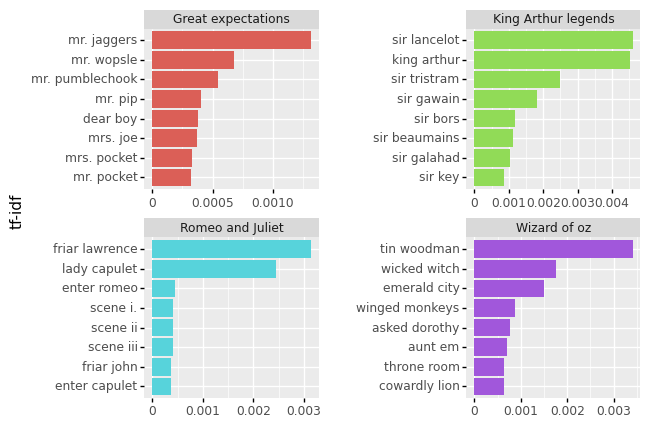

<ggplot: (8770339827610)>

In [93]:
from plotnine import *
from siuba.dply.forcats import fct_lump, fct_reorder

ggplot(ordered_graph_my_books) + aes(x=fct_reorder(ordered_graph_my_books['bigrams'], x=ordered_graph_my_books['tf_idf']), y='tf_idf', fill='book') + coord_flip() + geom_col(show_legend = False) + facet_wrap('~book', ncol = 2, scales = "free") + labs(x = "tf-idf", y = None) + theme(subplots_adjust={'wspace': 0.15}) + theme(subplots_adjust={'wspace': 0.85, 'hspace': 0.3}) + scale_x_discrete()

In [94]:
count(filter(my_books_df, _.word1 == 'not'), _.word1, _.word2, sort=True)
#cuv1 sa fie mereu 'not'

,word1,word2,n
0,not,",",116
1,not,to,93
2,not,be,91
3,not,a,56
4,not,have,46
...,...,...,...
615,not,laugh,1
616,not,lack,1
617,not,bleed,1
618,not,body,1


In [95]:
#cate cuv/structuri de cuv care dau un sentiment pozitiv, ne insala
from afinn import Afinn

afinn = Afinn()
afinn._dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [96]:
afinn_positive = {k: v for k, v in afinn._dict.items() if v > 0}
afinn_negative = {k: v for k, v in afinn._dict.items() if v < 0}
afinn_positive

{'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'achievable': 1,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'adopt': 1,
 'adopts': 1,
 'adorable': 3,
 'adoration': 3,
 'adore': 3,
 'adored': 3,
 'adores': 3,
 'adoring': 3,
 'adoringly': 3,
 'advanced': 1,
 'advantage': 2,
 'advantageous': 2,
 'advantageously': 2,
 'advantages': 2,
 'adventure': 2,
 'adventures': 2,
 'adventurous': 2,
 'advisable': 1,
 'affection': 3,
 'affectionate': 3,
 'affectionateness': 3,
 'affordable': 2,
 'aficionados': 2,
 'agog': 2,
 'agree': 1,
 'agreeable': 2

In [97]:
#bigrams cu al doilea cuvant pozitiv
my_books_df[my_books_df.word2.isin(afinn_positive)]

,book,bigrams,word1,word2
3,Wizard of oz,the wonderful,the,wonderful
14,Wizard of oz,is dedicated,is,dedicated
17,Wizard of oz,my good,my,good
18,Wizard of oz,good friend,good,friend
44,Wizard of oz,dorothy saved,dorothy,saved
...,...,...,...,...
225625,Great expectations,been stronger,been,stronger
225654,Great expectations,a better,a,better
225661,Great expectations,and good,and,good
225692,Great expectations,she rose,she,rose


In [98]:
my_books_df[my_books_df.word2.isin(afinn_negative)]

,book,bigrams,word1,word2
67,Wizard of oz,the cowardly,the,cowardly
82,Wizard of oz,the deadly,the,deadly
116,Wizard of oz,the wicked,the,wicked
138,Wizard of oz,the terrible,the,terrible
148,Wizard of oz,great humbug,great,humbug
...,...,...,...,...
225611,Great expectations,not hesitate,not,hesitate
225622,Great expectations,when suffering,when,suffering
225649,Great expectations,and broken,and,broken
225721,Great expectations,the ruined,the,ruined


In [99]:
afinn_df = pd.DataFrame({'word': afinn._dict.keys(), 'value' : afinn._dict.values()})
afinn_df
#cat de mult din positivity/negativity e de fapt false pos/neg

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
3377,yucky,-2
3378,yummy,3
3379,zealot,-2
3380,zealots,-2


In [100]:
not_sentiment_contribution = count(join(filter(my_books_df, _.word1 == 'not'), afinn_df, how = "inner", on = {"word2": "word"}), _.word2, _.value, sort=True)
not_sentiment_contribution
#aici in loc de 'not' poate sa fie 'never'

,word2,value,n
0,like,2,17
1,help,2,13
2,fail,-2,9
3,afraid,-2,8
4,doubt,-1,7
...,...,...,...
114,extend,1,1
115,excuse,-1,1
116,exaggerate,-2,1
117,enjoyed,2,1


In [101]:
not_sentiment_contribution = not_sentiment_contribution.assign(contribution=not_sentiment_contribution.value*not_sentiment_contribution.n)
not_sentiment_contribution

,word2,value,n,contribution
0,like,2,17,34
1,help,2,13,26
2,fail,-2,9,-18
3,afraid,-2,8,-16
4,doubt,-1,7,-7
...,...,...,...,...
114,extend,1,1,1
115,excuse,-1,1,-1
116,exaggerate,-2,1,-2
117,enjoyed,2,1,2


In [102]:
first_20_contribs = arrange(not_sentiment_contribution, -abs(_.contribution)).head(20)
first_20_contribs
#facem df final

,word2,value,n,contribution
0,like,2,17,34
1,help,2,13,26
2,fail,-2,9,-18
3,afraid,-2,8,-16
5,hurt,-2,6,-12
6,suffer,-2,6,-12
7,trouble,-2,5,-10
8,worth,2,5,10
18,die,-3,3,-9
23,angry,-3,3,-9


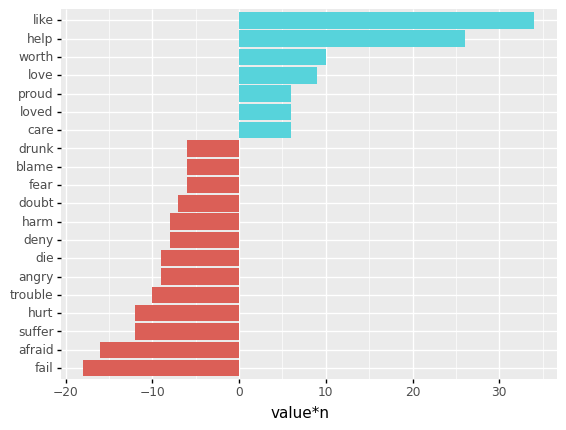

<ggplot: (8770338734430)>

In [103]:
(ggplot(first_20_contribs) + aes(x=fct_reorder(first_20_contribs['word2'], x=first_20_contribs['contribution']), y='value*n', fill = first_20_contribs.contribution > 0)
+ geom_col(show_legend=False)
+ coord_flip()
)

In [104]:
my_books_graph_df = my_books_test_df.drop(columns=['book'])
m_b_graph_df = count(my_books_graph_df, _.bigrams, _.word1, _.word2, sort=True).drop(columns=['bigrams'])
m_b_graph_df
#ne facem un df pt graf sa fie in formatul de grafic

,word1,word2,n
0,",",and,7417
1,.,“,1863
2,of,the,1643
3,’,s,1556
4,",",”,1552
...,...,...,...
125878,another,until,1
125879,keeping,!,1
125880,keepeth,to,1
125881,keepers,call,1


In [105]:
m_b_graph_df
m_b_graph_df_filtered = m_b_graph_df[~m_b_graph_df.word1.isin(remove_words)]
m_b_graph_df_filtered = m_b_graph_df_filtered[~m_b_graph_df_filtered.word2.isin(remove_words)]
m_b_graph_df_filtered_n = m_b_graph_df_filtered.head(35)
m_b_graph_df_filtered_n

,word1,word2,n
57,sir,lancelot,373
62,king,arthur,367
128,mr.,jaggers,214
140,sir,tristram,201
200,sir,gawain,147
287,tin,woodman,116
314,mr.,wopsle,110
391,sir,bors,96
432,sir,beaumains,90
441,mr.,pumblechook,89


In [106]:
import networkx as nx

#undirected graph
G = nx.from_pandas_edgelist(df=m_b_graph_df_filtered_n, source='word1', target='word2', edge_attr='n')

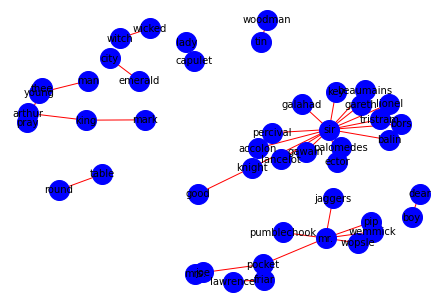

In [107]:
import matplotlib.pyplot as plt

#k-dist dintre noduri, iteratii- cu cat rulam de mai multe ori => separare mai buna
nx.draw(G, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=400, font_size=10, node_color='b', edge_color='r', with_labels=True)

plt.savefig('plotgraph.png', dpi=300, bbox_inches='tight')
plt.show()

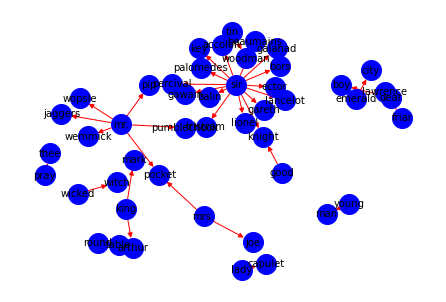

In [108]:
#directed graph
G_directed = nx.from_pandas_edgelist(df=m_b_graph_df_filtered_n, source='word1', target='word2', edge_attr='n', create_using=nx.DiGraph())
 
nx.draw(G_directed, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=400, font_size=10, node_color='b', edge_color='r', with_labels=True)
plt.savefig('plotgraph_dir.png', dpi=300, bbox_inches='tight')
plt.show()

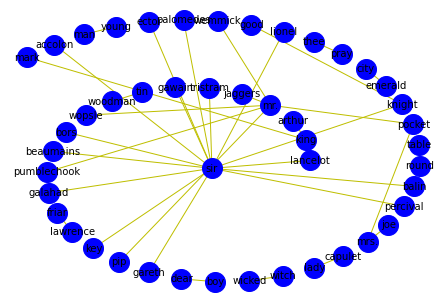

In [109]:
import matplotlib.pyplot as plt

#k-dist dintre noduri, iteratii- cu cat rulam de mai multe ori => separare mai buna
nx.draw(G, pos=nx.spiral_layout(G,equidistant=True), node_size=400, font_size=10, node_color='b', edge_color='y', with_labels=True)

plt.savefig('plotgraphspiral.png', dpi=300, bbox_inches='tight')
plt.show()